In [2]:
import pandas as pd
import os
import sys
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
#import matplotlib.pyplot as plt and seaborn for visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
# regular expressions for removing special characters, such as punctuation
import re
# gensim is a library for text processing including n-gram models
import gensim
from gensim.utils import simple_preprocess
# spacy is also for text processing, here we are using the lemmatiser
import spacy
# This package draws word clouds, as a form of frequency analysis
#!pip install wordcloud

In [4]:
imdb_df = pd.read_csv(r"C:\Users\ISMAIL\Downloads\IMDB Dataset (2).csv")

In [5]:
# Clean data ...
# Remove punctuation
imdb_df['review'] = imdb_df['review'].apply(str).map(lambda x: re.sub('[,\.!?]',
'', x))
# Convert the titles to lowercase
imdb_df['review'] = imdb_df['review'].apply(str).map(lambda x: x.lower())
# Print out the first rows of reviews
print(imdb_df['review'].apply(str).head())

0    one of the other reviewers has mentioned that ...
1    a wonderful little production <br /><br />the ...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object


In [6]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False)) #
#deacc=True removes punctuations
data = imdb_df['review'].tolist()
data = imdb_df['review'][0:500].tolist()
data_words = list(sent_to_words(data))
print('data_words[:1]', data_words[:1])

data_words[:1] [['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', 'oz', 'episode', 'you', 'll', 'be', 'hooked', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'br', 'br', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', 'trust', 'me', 'this', 'is', 'not', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'word', 'br', 'br', 'it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', 'the', 'prison',

In [7]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher
#threshold fewer phrases.
print('bigram',bigram)
print('bigram data',bigram[data_words])
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
print('trigram',trigram)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
bigram_mod.save("bigram_mod")
trigram_mod.save("trigram_mod")
bigram_mod = gensim.models.Phrases.load("bigram_mod")
trigram_mod = gensim.models.Phrases.load("trigram_mod")

bigram Phrases<81954 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
bigram data <gensim.interfaces.TransformedCorpus object at 0x0000023BC0D029A0>
trigram Phrases<82073 vocab, min_count=5, threshold=100, max_vocab_size=40000000>


In [8]:
for bigram in bigram_mod.phrasegrams.keys():
    print(bigram)


serial_killer
new_york
ve_seen
at_least
low_budget
year_old
reminds_me
ever_seen
high_school
special_effects
character_development
subject_matter
civil_war
cold_mountain
halfway_through
second_half
fast_forward
hong_kong
each_other
my_opinion
found_myself
years_ago
small_town
theme_song
rock_roll
star_trek
sit_through
sci_fi
huge_fan
jane_austen
anne_rice
new_world
pretty_woman
jackie_chan
throw_momma
gentleman_jim
ghost_stories
skeleton_dance
miss_dunne
bug_life


In [9]:
for trigram in trigram_mod.phrasegrams.keys():
    print(trigram)

serial_killer
looking_forward
ve_seen
at_least
low_budget
year_old
reminds_me
ever_seen
high_school
special_effects
character_development
subject_matter
civil_war
cold_mountain
second_half
fast_forward
each_other
my_opinion
in_my_opinion
found_myself
years_ago
small_town
theme_song
rock_roll
sit_through
huge_fan
jane_austen
anne_rice
new_world
pretty_woman
jackie_chan
throw_momma
gentleman_jim
ghost_stories
skeleton_dance
miss_dunne
bug_life


In [10]:
#Lemmitisation
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.union(set(['br']))
# Define functions for stopwords, bigrams, trigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in
my_stop_words] for doc in texts]
def make_bigrams(texts):
    return[bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [11]:
from gensim.parsing.preprocessing import STOPWORDS
my_stop_words = STOPWORDS.union(set(['br']))
# Define functions for stopwords, bigrams, trigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in
my_stop_words] for doc in texts]

In [12]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [13]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in
allowed_postags])
    return texts_out

In [14]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN',
'ADJ', 'VERB', 'ADV'])
print('data_lemmatized[:1]', data_lemmatized[:1])

data_lemmatized[:1] [['reviewer', 'mention', 'watch', 'episode', 'hook', 'right', 'exactly', 'happen', 'thing', 'strike', 'brutality', 'unflinche', 'scene', 'violence', 'set', 'right', 'word', 'trust', 'faint', 'hearted', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'call', 'nickname', 'give', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privacy', 'high', 'agenda', 'home', 'muslim', 'italian', 'irish', 'moreso', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'far', 'away', 'main', 'appeal', 'fact', 'go', 'show', 'forget', 'pretty', 'picture', 'paint', 'mainstream', 'audience', 'forget', 'charm', 'romanceoz', 'mess', 'episode', 'see', 'strike', 'nasty', 'surreal', 'ready', 'watch', 'develop', 'taste', 'get', 'accustom', 'high', 'level', 'graphic', 'violence', 'violence', 'injustice', 'crook', 'guard', 'sell', 'ni

In [15]:
#!pip install "C:\Users\ISMAIL\Downloads\en_core_web_sm-3.5.0-py3-none-any.whl"

In [16]:
#Used to download spacy('en_core_web_sm')
#import spacy
#nlp = spacy.load('en_core_web_sm')

In [17]:
from wordcloud import WordCloud
#Generating a word cloud from the lemmatised data to visualize the most frequent terms
def getWordCloud(hashtags):
# Read the whole text.
    text = ' '.join(hashtags)
# Generate a word cloud image
    wordcloud = WordCloud().generate(text)
# Display the generated image:
# the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
# lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('wordcloud_all.pdf', dpi=500)
    plt.show()

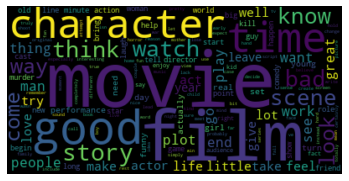

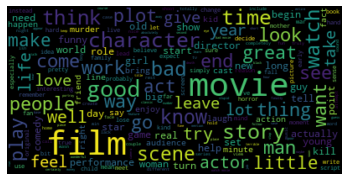

In [18]:
#it expects string as input, so i will briefly loop over the data again to convert it to a format it will accept. 
#Afterwards i will get two word clouds printed below
s = []
for l in data_lemmatized:
    t = ' '.join(l)
    s.append(t)
getWordCloud(s)

## Sentiment Analysis

In [19]:
#Classification 
imdb_df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production <br /><br />the ...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [20]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [21]:
print(imdb_df.shape)
imdb_df.head(20)

(50000, 2)


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production <br /><br />the ...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
5,probably my all-time favorite movie a story of...,positive
6,i sure would like to see a resurrection of a u...,positive
7,this show was an amazing fresh & innovative id...,negative
8,encouraged by the positive comments about this...,negative
9,if you like original gut wrenching laughter yo...,positive


In [22]:
# Looking into classification here... 

imdb_data = []
imdb_labels= []

sentiments = imdb_df['sentiment']

for i, x in enumerate(data_lemmatized): 
  label = sentiments[i]
  if label=="negative":
    imdb_labels.append(0)
  else:    
    imdb_labels.append(1)
  imdb_data.append(' '.join(x))

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(imdb_data)  
print(X_train_counts.shape)

count_vect.vocabulary_.get(u'algorithm')

from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print(X_train_tf.shape)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, imdb_labels)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, imdb_labels, test_size=0.33, random_state=42)

clf = MultinomialNB().fit(X_train, y_train)

predicted = clf.predict(X_test)
print(predicted)
np.mean(predicted == y_test)

(500, 8152)
(500, 8152)
[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]


0.6060606060606061

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, predicted)
cm = confusion_matrix(y_test, predicted)
cr = classification_report(y_test, predicted)

In [25]:
print("Accuracy is :",ac)

Accuracy is : 0.6060606060606061


In [26]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       0.55      0.96      0.70        80
           1       0.88      0.27      0.41        85

    accuracy                           0.61       165
   macro avg       0.72      0.62      0.56       165
weighted avg       0.72      0.61      0.55       165



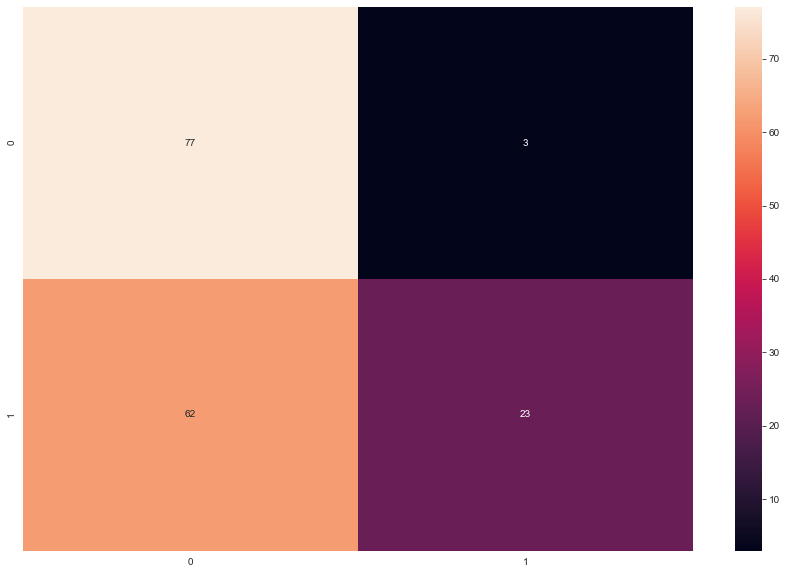

In [27]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()